In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
hay_duplicados = train.duplicated().any()
hay_duplicados

False

### MSSubClass
Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [6]:
train.MSSubClass.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSSubClass
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


<AxesSubplot: >

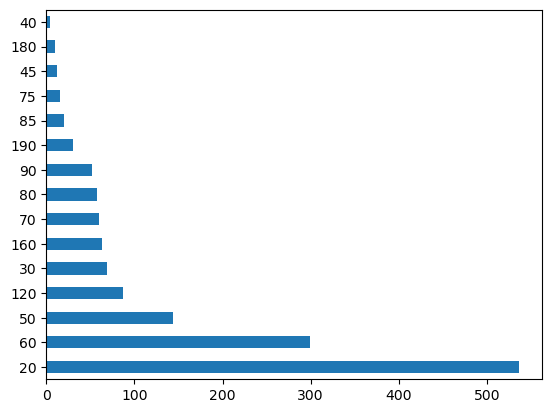

In [7]:
train.MSSubClass.value_counts().plot(kind = 'barh')

Codificacion one-hot:permite representar una variable categórica como una serie de variables binarias (0 o 1) que pueden ser interpretadas directamente por un modelo de regresión. En lugar de tratar una variable categórica como una sola variable numérica, la codificación one-hot permite que el modelo tenga en cuenta la presencia o ausencia de cada categoría como un predictor separado

In [8]:
col_tt = train.columns
df_hot_e = pd.get_dummies(train, columns=['MSSubClass'])
df_hot_e = df_hot_e.filter(['Id', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190'], axis=1)

In [9]:
encoder_dic = {}
encoder_dic['MSSubClass'] = df_hot_e

### MSZoning       
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [10]:
train.MSZoning.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSZoning
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [11]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [12]:
df = pd.get_dummies(train, columns=['MSZoning'])
df = df.filter(df.columns[-5::])
encoder_dic['MSZoning'] = df

### LotFrontage: 
Linear feet of street connected to property

In [13]:
train.LotFrontage.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [14]:
train.LotFrontage.median()

69.0

In [15]:
train.LotFrontage.describe().round(2)

count    1201.00
mean       70.05
std        24.28
min        21.00
25%        59.00
50%        69.00
75%        80.00
max       313.00
Name: LotFrontage, dtype: float64

Histograma antes de la imputacion de valores nan

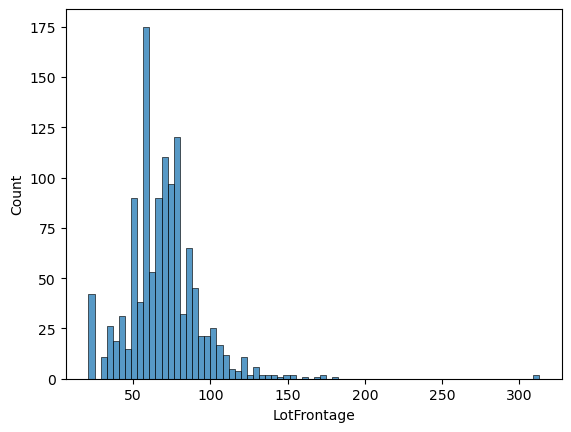

In [16]:
hist_originalLF = sns.histplot(train.LotFrontage)

<AxesSubplot: xlabel='LotFrontage', ylabel='Count'>

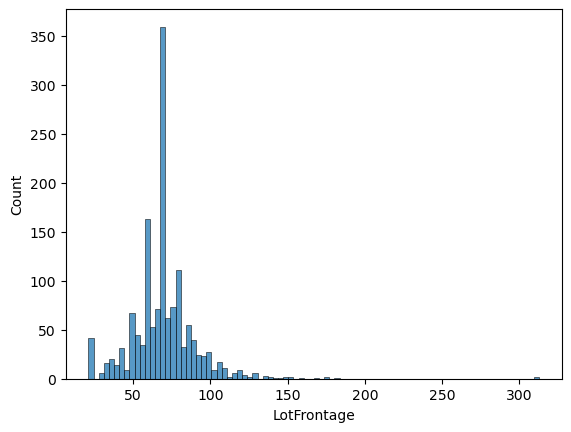

In [17]:
media = train.LotFrontage.mean()
imputacion_media = train.LotFrontage.fillna(media)
sns.histplot(imputacion_media)

Mi primera opcion fue imputar los valores faltantes con la media/mediana/moda pero sesgaba mucho la muestra, asi que opte por usar la funcion de pandas: 'interpolate', la interpolación lineal es un método simple que utiliza una línea recta para estimar los valores faltantes en un conjunto de datos. La idea es que, si se conocen dos puntos en una línea recta, se puede estimar el valor de cualquier otro punto en la línea recta utilizando la fórmula de la ecuación de una línea recta.

In [18]:
df = train.LotFrontage.interpolate()
df.isnull().sum()

0

Text(0.5, 1.0, 'Datos imputados')

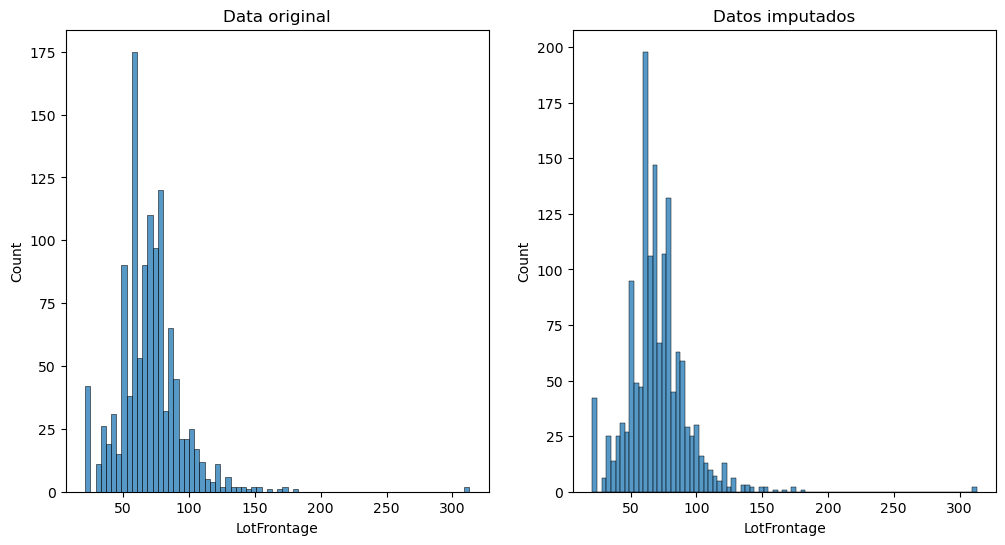

In [19]:
fig, axs = sns.mpl.pyplot.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graficar el primer conjunto de datos en la primera subtrama
sns.histplot(train.LotFrontage, ax=axs[0])
axs[0].set_title('Data original')

# Graficar el segundo conjunto de datos en la segunda subtrama
sns.histplot(df, ax=axs[1])
axs[1].set_title('Datos imputados')

In [20]:
col1 = df.describe().round(2)
col2 = train.LotFrontage.describe().round(2)
rdo = pd.DataFrame()
rdo['Original'] = col2
rdo['Imputados'] = col1
rdo

,Original,Imputados
count,1201.00,1460.00
mean,70.05,70.21
std,24.28,23.05
min,21.00,21.00
25%,59.00,60.00
50%,69.00,69.50
75%,80.00,80.00
max,313.00,313.00


In [21]:
train.LotFrontage = df

In [22]:
train.drop(['MSSubClass', 'MSZoning'], axis = 1, inplace = True)

### LotArea
Lot size in square feet

In [23]:
train.LotArea.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


<AxesSubplot: xlabel='LotArea', ylabel='Count'>

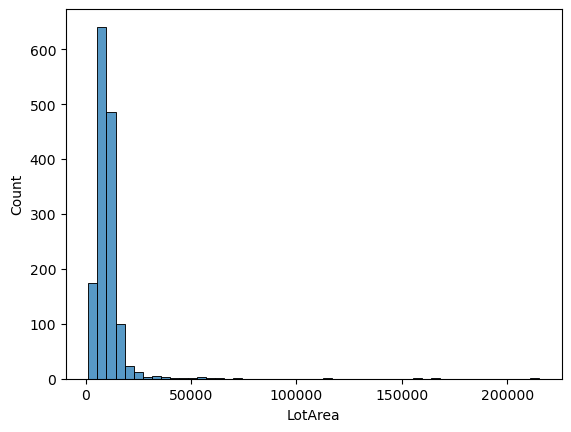

In [24]:
sns.histplot(train.LotArea, bins = 50)

### Street
Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [25]:
train.Street.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Street
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [26]:
train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [27]:
dic_map = {'Grvl': 0,'Pave': 1}
train.Street = train['Street'].map(dic_map)

In [28]:
train.Street.value_counts()

1    1454
0       6
Name: Street, dtype: int64

### Alley
Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [29]:
train.Alley.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
91 non-null     object
dtypes: object(1)
memory usage: 11.5+ KB


In [30]:
train.drop(['Alley'], axis = 1, inplace = True)

### LotShape
General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [31]:
train.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [32]:
df = pd.get_dummies(train, columns=['LotShape'])
encoder_dic['LotShape'] = df.filter(df.columns[-4::])

In [33]:
train.drop(['LotShape'], axis = 1, inplace = True)

### LandContour: 
Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [34]:
train.LandContour.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LandContour
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [35]:
train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [36]:
df = pd.get_dummies(train, columns=['LandContour'])
encoder_dic['LandContour'] = df.filter(df.columns[-4::])
train.drop(['LandContour'], axis = 1, inplace = True)

###  Utilities
Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [37]:
train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
train.drop(['Utilities'], axis = 1, inplace = True)

### LotConfig: 
Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [39]:
train.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [40]:
1052/1460

0.7205479452054795

### LandSlope:
Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [41]:
train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [42]:
train.drop(['Street', 'LotConfig', 'LandSlope'], axis=1, inplace = True)

### Neighborhood
Physical locations within Ames city limits

In [43]:
train.Neighborhood.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Neighborhood
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


<AxesSubplot: >

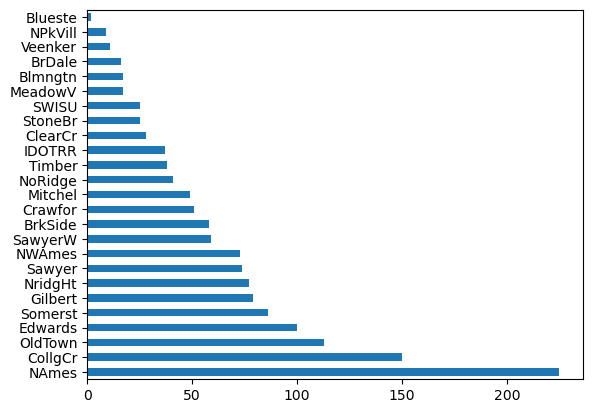

In [44]:
train.Neighborhood.value_counts().plot(kind = 'barh')

In [45]:
def encodear(df, columna):
    n = df[columna].value_counts()
    df = pd.get_dummies(train, columns=[columna])
    data = pd.DataFrame()
    data = df.filter(df.columns[-5::])
    data['Id'] = df.Id
    
    encoder_dic[columna] = data

In [46]:
encodear(train, 'Neighborhood')

### Condition
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [47]:
condition = train.filter(['Condition1', 'Condition2'], axis = 1)

In [48]:
condition.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [49]:
condition.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

Si 0= la propiedad tiene dos accesos, si 1= un solo acceso

In [50]:
train['Condition'] = np.where(train['Condition1'] != train['Condition2'], 0, 1)
train.drop(['Neighborhood', 'Condition1', 'Condition2'], axis = 1, inplace = True)

### BldgType
Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [51]:
train.BldgType.value_counts()


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

#### OverallQual:
Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
####  OverallCond: 
Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [52]:
train['Mean_rank'] = (train.OverallQual + train.OverallCond) / 2
train.drop(['BldgType', 'HouseStyle', 'OverallQual', 'OverallCond'], axis = 1, inplace = True)

### YearBuilt

In [53]:
train.YearBuilt.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: YearBuilt
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


<AxesSubplot: xlabel='YearBuilt', ylabel='Count'>

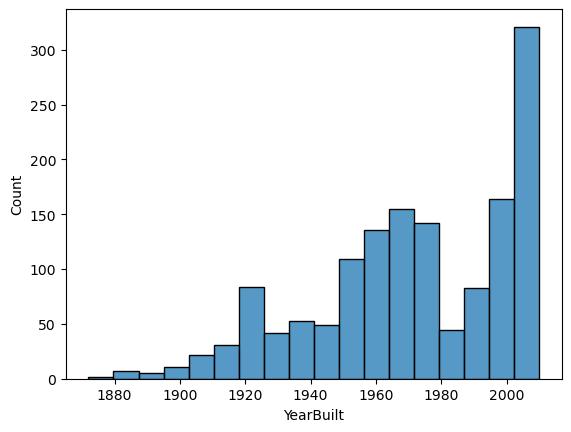

In [54]:
sns.histplot(train.YearBuilt)

#### YearRemodAdd: 
Remodel date (same as construction date if no remodeling or additions)

Si SOn iguales(0) no hubo remodelaciones, si != la casa cuenta con remodelaciones

In [55]:
train['YearRemod'] = np.where(train['YearRemodAdd'] == train['YearBuilt'], 0, 1)

In [56]:
train.drop(['YearRemodAdd'], axis = 1, inplace = True)

<AxesSubplot: >

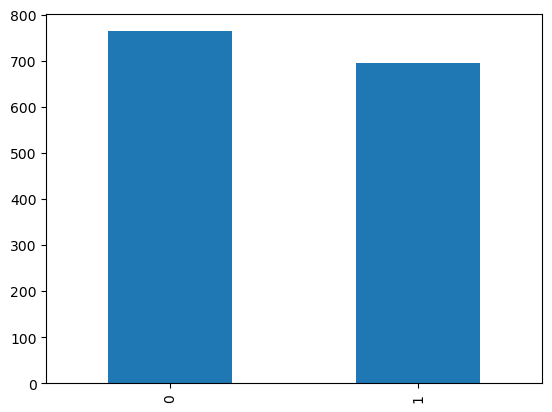

In [57]:
train.YearRemod.value_counts().plot(kind = 'bar')

In [58]:
train.drop(['RoofStyle', 'RoofMatl'], axis = 1, inplace = True)

### Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
### Exterior2nd: 
Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

SI son == (0) el exterior cuenta con un solo material

In [59]:
train['Exterior'] = np.where(train['Exterior1st'] == train['Exterior2nd'], 0, 1)
train.drop(['Exterior1st', 'Exterior2nd'], axis = 1, inplace = True)

### MasVnrType
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

In [60]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [61]:
train.drop(['MasVnrType', 'MasVnrArea'], axis = 1, inplace = True)

### ExterQual: 
Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
### ExterCond: 
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [62]:
train.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [63]:
train.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [64]:
encodear(train, 'ExterCond')
encodear(train, 'ExterQual')

In [65]:
train.drop(['ExterCond', 'ExterQual'], axis=1, inplace = True)

### Foundation: 
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [66]:
train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [67]:
encodear(train, 'Foundation')

In [68]:
train.drop(['Foundation'], axis=1, inplace = True)

In [69]:
train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'Condition', 'Mean_rank', 'YearRemod', 'Exterior'],
      dtype='object')

### TotalSF: 
Total square feet per house


In [70]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [71]:
train.drop(['BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis=1, inplace = True)

<AxesSubplot: xlabel='TotalSF', ylabel='Count'>

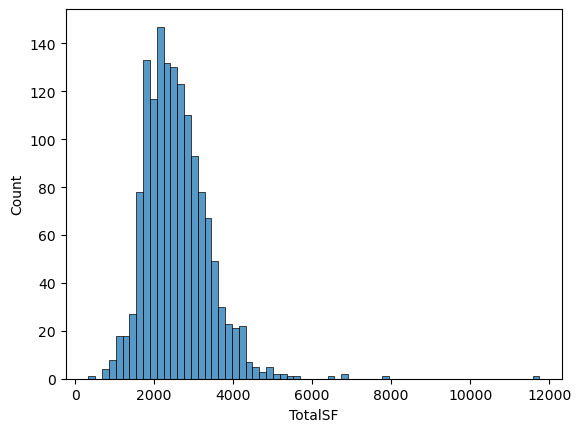

In [72]:
sns.histplot(train.TotalSF)

###  CentralAir
Central air conditioning

       N	No
       Y	Yes

In [73]:
map_d = {'N': 0, 'Y': 1}
train.CentralAir = train.CentralAir.map(map_d)

<AxesSubplot: >

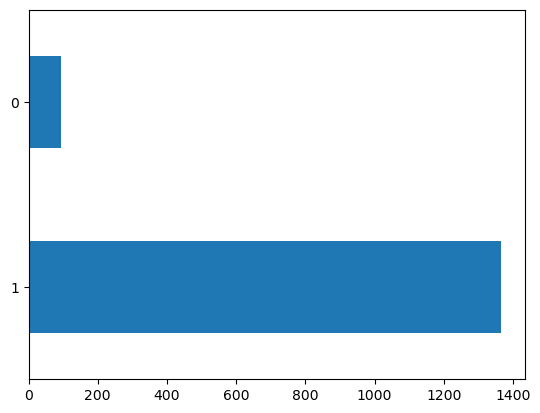

In [74]:
train.CentralAir.value_counts().plot(kind = 'barh')

### Bath

In [75]:
train['TotalBath'] = train['BsmtFullBath'] + train['BsmtHalfBath']/2 + train['FullBath'] + train['HalfBath']/2

<AxesSubplot: >

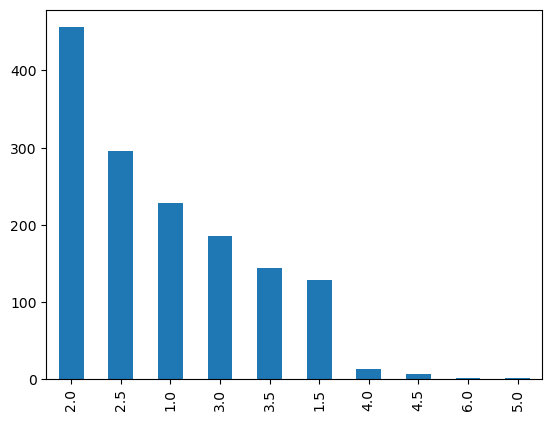

In [76]:
train['TotalBath'].value_counts().plot(kind = 'bar')

In [77]:
train.drop(['Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'LowQualFinSF', 'KitchenQual', 'TotRmsAbvGrd', 'Functional','FireplaceQu', 'GarageQual','GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive'], axis = 1, inplace = True)

### Fireplaces

In [78]:
train.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   CentralAir     1460 non-null   int64  
 5   GrLivArea      1460 non-null   int64  
 6   BedroomAbvGr   1460 non-null   int64  
 7   KitchenAbvGr   1460 non-null   int64  
 8   Fireplaces     1460 non-null   int64  
 9   GarageArea     1460 non-null   int64  
 10  WoodDeckSF     1460 non-null   int64  
 11  OpenPorchSF    1460 non-null   int64  
 12  EnclosedPorch  1460 non-null   int64  
 13  3SsnPorch      1460 non-null   int64  
 14  ScreenPorch    1460 non-null   int64  
 15  PoolArea       1460 non-null   int64  
 16  PoolQC         7 non-null      object 
 17  Fence          281 non-null    object 
 18  MiscFeat

In [80]:
train.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace = True)

###  WoodDeckSF     
Wood deck area in square feet

<AxesSubplot: xlabel='WoodDeckSF', ylabel='Count'>

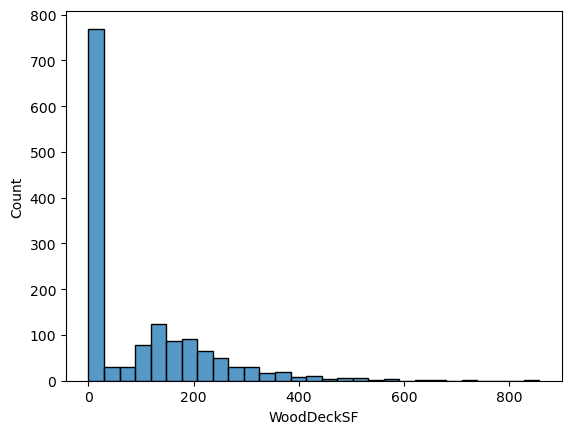

In [81]:
sns.histplot(train.WoodDeckSF)

In [82]:
train.WoodDeckSF.describe()

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

In [83]:
# Si es 0, significa que tiene madera, en cambio si es 1 no hay
train['WoodYN'] = np.where(train.WoodDeckSF > 0, 0, 1)

<AxesSubplot: >

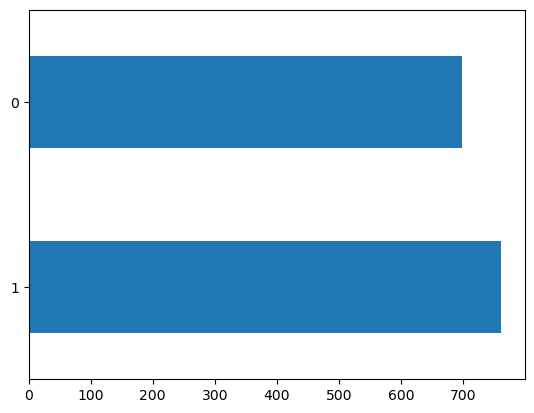

In [84]:
train['WoodYN'].value_counts().plot(kind= 'barh')

Dejo solamente OpenPorchSF porque es la que mas corrleacion tiene con Salepx

In [85]:
train.drop(['WoodDeckSF', 'EnclosedPorch', '3SsnPorch', '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True)

In [90]:
train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'CentralAir', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'OpenPorchSF', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'Condition', 'Mean_rank', 'YearRemod',
       'Exterior', 'TotalSF', 'TotalBath', 'WoodYN'],
      dtype='object')

### Pools

<AxesSubplot: >

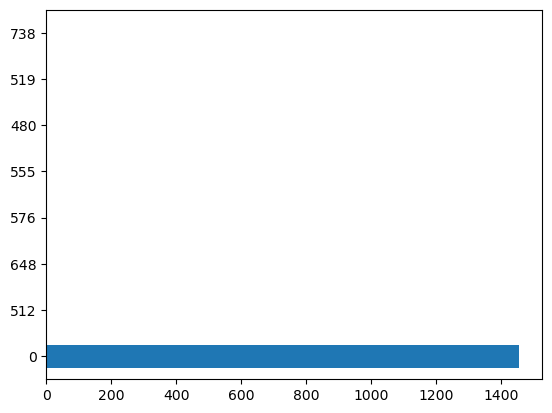

In [88]:
train.PoolArea.value_counts().plot(kind = 'barh')

In [91]:
train.drop(['PoolArea'], axis = 1, inplace = True)


### MiscVal: 
$Value of miscellaneous feature


In [94]:
train.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [95]:
train.drop(['MiscVal'], axis = 1, inplace = True)

'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice',

<AxesSubplot: >

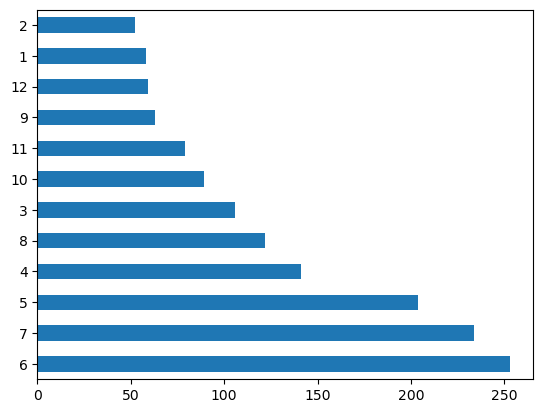

In [100]:
train.MoSold.value_counts().plot(kind = 'barh')

<AxesSubplot: >

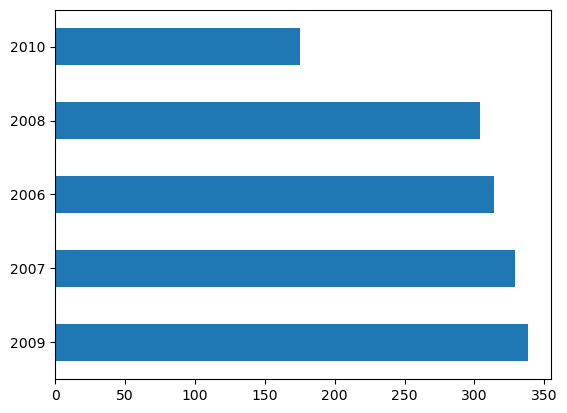

In [106]:
train.YrSold.value_counts().plot(kind = 'barh')

In [102]:
train.YrSold.describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

### SaleType:
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other


In [108]:
train.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [109]:
train.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [110]:
train.drop(['SaleCondition', 'SaleType'], axis = 1, inplace = True)

In [123]:
df = pd.DataFrame()
df['Age'] = train.YrSold - train.YearBuilt
df['SalePrice'] = train.SalePrice
df['YrSold'] = train.YrSold
df['YearBuilt'] = train.YearBuilt
df['MoSold'] = train.MoSold

In [124]:
corr = df.corr().round(3)
corr.SalePrice

Age         -0.523
SalePrice    1.000
YrSold      -0.029
YearBuilt    0.523
MoSold       0.046
Name: SalePrice, dtype: float64

In [125]:
train.drop(['MoSold', 'YrSold'], axis = 1, inplace = True)

In [127]:
train.to_csv("Train_data.csv")

In [131]:
import csv
nombre_archivo = 'encoder_dic.csv'

# Abre el archivo en modo escritura
with open(nombre_archivo, mode='w', newline='') as archivo_csv:

    # Define el encabezado de las columnas
    columnas = ['clave', 'valor']

    # Crea un objeto DictWriter
    writer = csv.DictWriter(archivo_csv, fieldnames=columnas)

    # Escribe el encabezado
    writer.writeheader()

    # Escribe cada fila del diccionario como una fila en el archivo CSV
    for clave, valor in encoder_dic.items():
        writer.writerow({'clave': clave, 'valor': valor})

print(f'Se ha guardado el diccionario en el archivo CSV "{nombre_archivo}".')

Se ha guardado el diccionario en el archivo CSV "encoder_dic.csv".
